--------------------------------------------------------------------------------

TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:

y : CDRGLOB
X : all columns except for the label
Train-test split: .80-.20 (please use the stratify parameter)
Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.

TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its parameters) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values. 

TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels. For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.

TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions. 

TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education.
--------------------------------------------------------------------------------


________________________________________________________________________________
>TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:

>y : CDRGLOB X : all columns except for the label Train-test split: .80-.20 (please use the stratify parameter) Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.
________________________________________________________________________________

In [102]:
import pandas as pd
data=pd.read_excel('Temporary_data3_Left_Right_Copy.xlsx')
data

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,20,1,1,1,1,1,0,0,0,...,24.6892,2.6528,10.5460,2.1712,14.1128,2.8833,9.3176,2.3582,0.6735,1.0270
1350,1,16,1,2,1,0,1,0,0,0,...,24.7908,2.0993,10.4094,1.4855,10.7880,1.9027,10.2034,2.0484,0.7267,0.7946
1351,2,14,2,1,1,1,1,0,0,0,...,23.8500,2.1200,12.3900,1.5300,12.6600,1.9900,9.4800,1.7400,1.1800,1.5900
1352,2,20,3,1,1,1,1,25,0,0,...,31.3500,2.4300,10.8200,1.7000,13.7700,2.1000,11.1200,2.1400,1.3100,1.5200


In [103]:
Y=data['CDRGLOB']
X=data.drop(['CDRGLOB'], axis=1)

In [104]:
Y

0       0
1       2
2       0
3       0
4       1
       ..
1349    1
1350    2
1351    0
1352    0
1353    0
Name: CDRGLOB, Length: 1354, dtype: int64

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model=GaussianNB()

In [106]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, Y, random_state=0,train_size=0.8)

In [107]:
from sklearn.model_selection import cross_val_score
for i in (5,10):
  scores=cross_val_score(model, X1, y1, cv=i)
  print("k={k} için ortalama score {skor}".format(k=i,skor=scores.mean()))
  

k=5 için ortalama score 0.6047064345451443
k=10 için ortalama score 0.6010703363914374


K=5 iken Skor değeri daha yüksek.

Cross-validationda K değeri arttıkça ortalama score düşüyor.

________________________________________________________________________________
>TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its 3 parameters at least with 5 different values for each) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values on the test dataset. 

________________________________________________________________________________

Kneighbors algoritmasının kendi parametrelerini kullanmaya çalıştığım için her özellikten 5 farklı seviye bulamadım!!!

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
model3=KNeighborsClassifier()


param_grid = {'n_neighbors':[5,6,7,8,9],
              'weights':['uniform','distance'],
              'algorithm':['ball_tree','kd_tree','brute']}

grid = GridSearchCV(model3, param_grid, cv=5)

In [109]:
grid.fit(X1, y1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [110]:
grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'uniform'}

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model3 = grid.best_estimator_
y_test3 = model3.fit(X1, y1).predict(X2)
score=cross_val_score(model3, X1, y1, cv=5)
score.mean()

0.5355820105820105

In [112]:
accuracy_score(y_test,y2)

0.5350553505535055

Grid Run yöntemiyle elde edilen 0.47 iken 
GaussianNB k=5 cross-validation ile 0.6047 bulunmuştur. GaussianNB daha iyi accuracy vermektedir. Grid Run'ı farklı algoritmalarla çalıştırmakta fayda var.

________________________________________________________________________________
>TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels (separately for true labels and predicted labels in 2 different graphs). For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.
________________________________________________________________________________

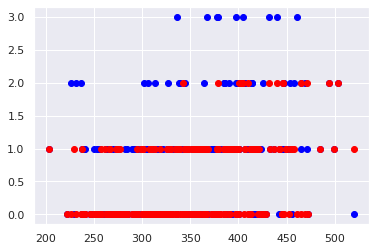

In [157]:
plt.scatter(X2['CSFVOL'], y2,color='blue')
lim = plt.axis()
plt.scatter(X2['CSFVOL'], y_test,color='red');
plt.axis(lim);

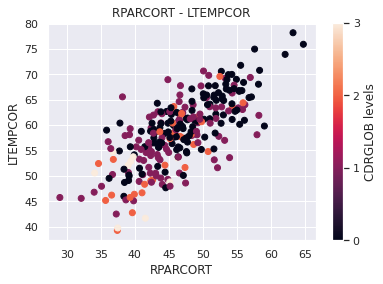

In [145]:
plt.scatter(X2["RPARCORT"], X2["LTEMPCOR"],c=y2)
plt.title("RPARCORT - LTEMPCOR")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

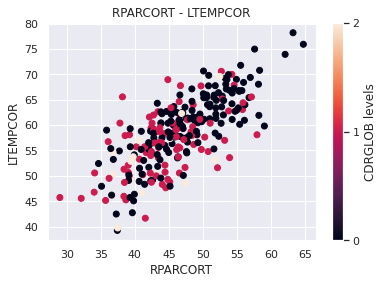

In [148]:
plt.scatter(X2["RPARCORT"], X2["LTEMPCOR"],c=y_test3)
plt.title("RPARCORT - LTEMPCOR")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

________________________________________________________________________________
>TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions.
________________________________________________________________________________

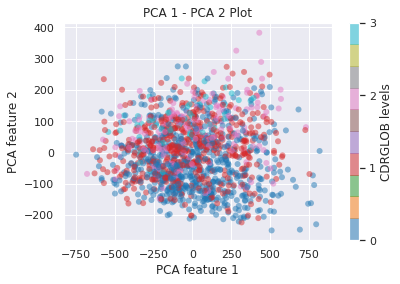

In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_x = pca.fit_transform(X)
plt.scatter(pca_x[:, 0], pca_x[:, 1],c=Y,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.title("PCA 1 - PCA 2 Plot")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("PCA feature 2")
plt.xlabel("PCA feature 1")
plt.show()

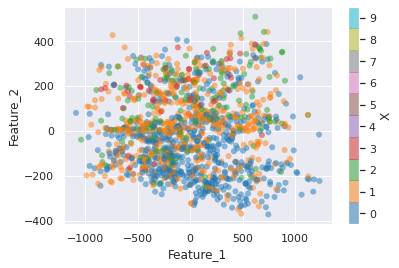

In [115]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(X)

plt.scatter(data_projected[:, 0], data_projected[:, 1],c=Y,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar(label='X', ticks=range(10))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.clim(-0.5, 9.5);


________________________________________________________________________________
>TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education.
________________________________________________________________________________

a)K-means algoritması çalıştırılırsa...

In [139]:
from sklearn.cluster import KMeans
model4=KMeans(n_clusters = 3)
model4.fit(X1, y1)
y_model4 = model4.predict(X2)
accuracy_score(y2, y_model4)


0.36531365313653136

Accuracy:0.3657 civarı bulunur.

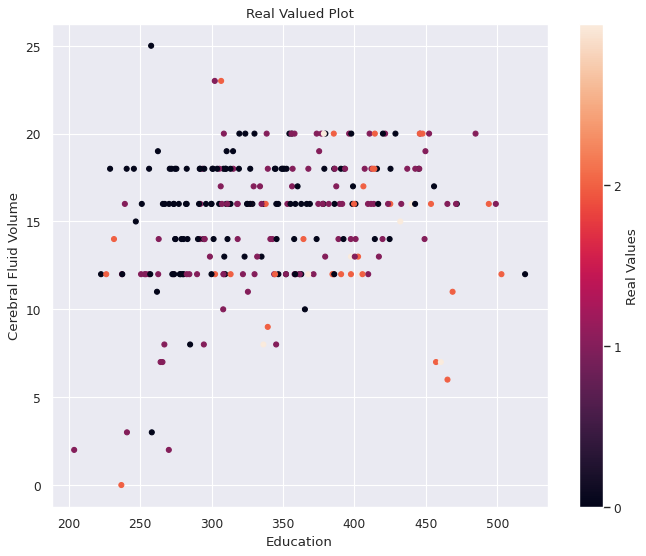

In [140]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(X2['CSFVOL'], X2["EDUC"],c=y2,s=20)
plt.title("Real Valued Plot")
plt.colorbar(label="Real Values",ticks=range(3))
plt.ylabel("Cerebral Fluid Volume")
plt.xlabel("Education")
plt.show();

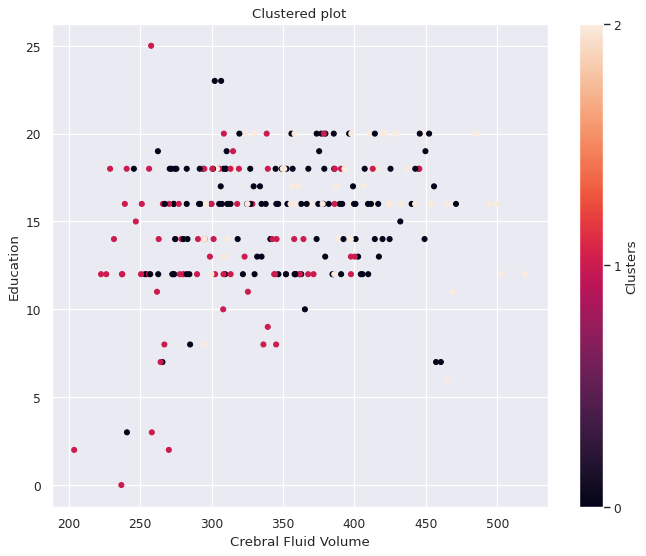

In [141]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(X2["CSFVOL"], X2["EDUC"],c=y_model4, s=20)
plt.title("Clustered plot")
plt.colorbar(label="Clusters",ticks=range(3))
plt.ylabel("Education")
plt.xlabel("Crebral Fluid Volume")
plt.show();

b)GMM algoritması çalıştırılırsa...

In [142]:
from  sklearn.mixture import GaussianMixture
model5=GaussianMixture()
model5.fit(X1,y1)
y_model5=model5.predict(X2)
accuracy_score(y2,y_model5)

0.47232472324723246

Accuracy:0.47 civarı bulunur.

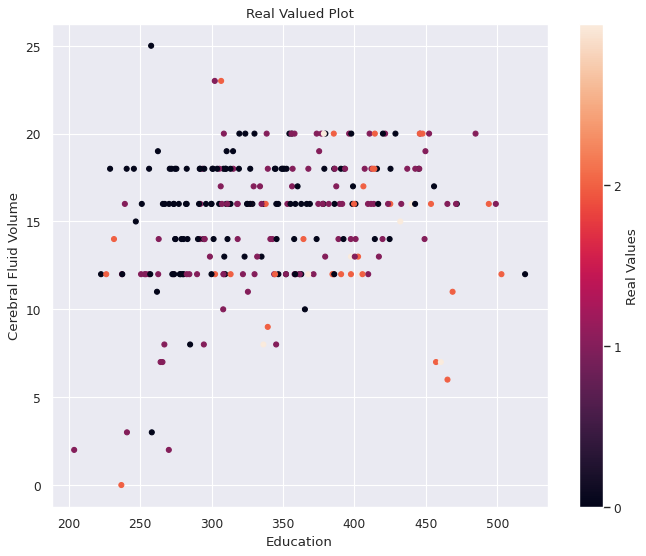

In [143]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(X2['CSFVOL'], X2["EDUC"],c=y2,s=20)
plt.title("Real Valued Plot")
plt.colorbar(label="Real Values",ticks=range(3))
plt.ylabel("Cerebral Fluid Volume")
plt.xlabel("Education")
plt.show();

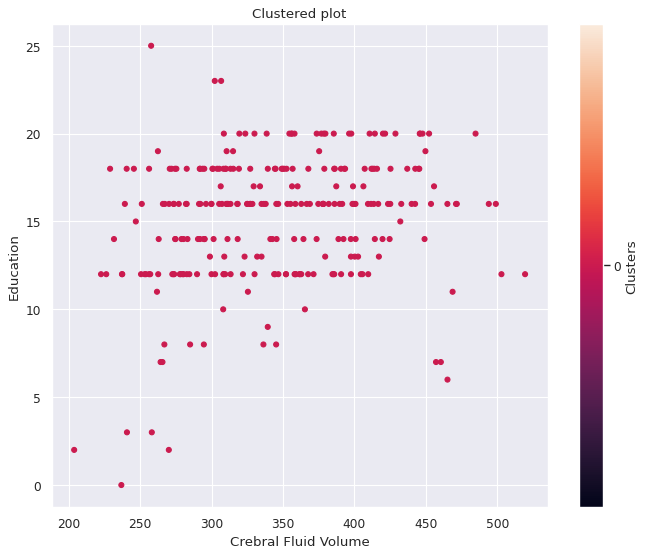

In [144]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state=0)
my_clusters = kmeans.fit_predict(X)
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(X2["CSFVOL"], X2["EDUC"],c=y_model5, s=20)
plt.title("Clustered plot")
plt.colorbar(label="Clusters",ticks=range(3))
plt.ylabel("Education")
plt.xlabel("Crebral Fluid Volume")
plt.show();